Name : D.Kirthik
Domain: Computer Vision and IoT
Task-2

In [56]:
#required library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


In [57]:
#importing the image
image = cv2.imread('ronaldo.jpg')

In [58]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


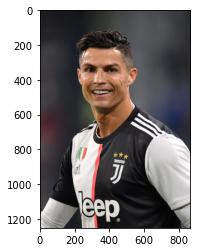

In [59]:
#To resize the image we can use cv2.resize(file,(dimensions))
resized_image = cv2.resize(image,(868,1252))
plt.imshow(resized_image)

In [64]:
#define a function to convert RGB to HEX
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [65]:
# define a method that will help us get an image into Python in the RGB space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [66]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([146.39887039,  95.53900088,  64.91664232]),
 array([240.66987468, 237.90285952, 237.41992661]),
 array([17.77107629, 16.82139776, 18.26736063]),
 array([206.20945676, 138.9399952 , 112.16465317]),
 array([40.66633477, 39.23839289, 42.85391083]),
 array([134.58064516, 131.40587814, 125.95340502]),
 array([214.14403317, 210.72437207, 208.66488403]),
 array([84.5523863 , 84.87741274, 89.03566235]),
 array([61.6960869 , 57.77148912, 62.87843065]),
 array([182.48773036, 177.78752341, 173.90943136])]

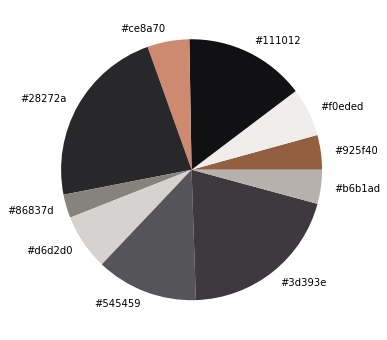

In [69]:
get_colors(get_image('ronaldo.jpg'), 10, True)